In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df = pd.read_csv('pd_speech_featurees.csv')

y = df["class"]
X = df.drop(labels='class', axis=1)
print(X)

      id  gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
0      0       1  0.85247  0.71826  0.57227        240               239   
1      0       1  0.76686  0.69481  0.53966        234               233   
2      0       1  0.85083  0.67604  0.58982        232               231   
3      1       0  0.41121  0.79672  0.59257        178               177   
4      1       0  0.32790  0.79782  0.53028        236               235   
..   ...     ...      ...      ...      ...        ...               ...   
751  250       0  0.80903  0.56355  0.28385        417               416   
752  250       0  0.16084  0.56499  0.59194        415               413   
753  251       0  0.88389  0.72335  0.46815        381               380   
754  251       0  0.83782  0.74890  0.49823        340               339   
755  251       0  0.81304  0.76471  0.46374        340               339   

     meanPeriodPulses  stdDevPeriodPulses  locPctJitter  ...  \
0            0.008064  

In [25]:
from sklearn import preprocessing


le = preprocessing.LabelEncoder()
le.fit([1, 0])
preprocessing.LabelEncoder()

LabelEncoder()

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_test.count(), "\n", X_train.count())

id                           227
gender                       227
PPE                          227
DFA                          227
RPDE                         227
                            ... 
tqwt_kurtosisValue_dec_32    227
tqwt_kurtosisValue_dec_33    227
tqwt_kurtosisValue_dec_34    227
tqwt_kurtosisValue_dec_35    227
tqwt_kurtosisValue_dec_36    227
Length: 754, dtype: int64 
 id                           529
gender                       529
PPE                          529
DFA                          529
RPDE                         529
                            ... 
tqwt_kurtosisValue_dec_32    529
tqwt_kurtosisValue_dec_33    529
tqwt_kurtosisValue_dec_34    529
tqwt_kurtosisValue_dec_35    529
tqwt_kurtosisValue_dec_36    529
Length: 754, dtype: int64


In [28]:
x1, x2 = 0, 0
for data in y_train:
    if data==0:
        x1 += 1
    else:
        x2 += 1
print(x1)
print(x2)

130
399


In [29]:
x1, x2 = 0, 0
for data in y_test:
    if data==0:
        x1 += 1
    else:
        x2 += 1
print(x1)
print(x2)

62
165


C:\Users\ASC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


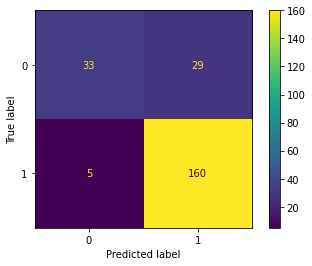

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

accuracy_list = []
rfm = RandomForestClassifier()
rfm.fit(X_train, y_train)
rfm_pred = rfm.predict(X_test)
plot_confusion_matrix(rfm, X_test, y_test)
rfm_acc = accuracy_score(y_test, rfm_pred)
accuracy_list.append(rfm_acc * 100)

C:\Users\ASC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\ASC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


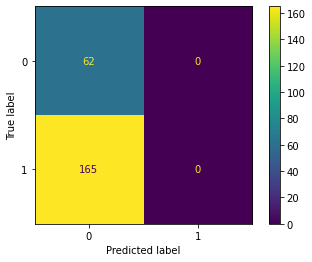

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(scaled_X_train, y_train)
knn_pred = knn.predict(scaled_X_test)
plot_confusion_matrix(knn, X_test, y_test)
knn_acc = accuracy_score(y_test, knn_pred)
accuracy_list.append(knn_acc * 100)

C:\Users\ASC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


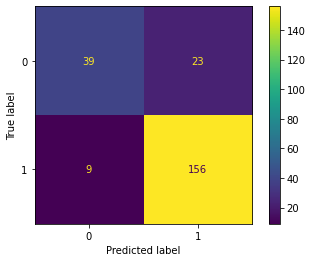

In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
svc = SVC(decision_function_shape='ovo', class_weight='balanced')
param_grid = {'C': [0.001, 0.01, 0.1, 0.5, 1], 'gamma': ['scale', 'auto']}
grid = GridSearchCV(svc, param_grid)
grid.fit(scaled_X_train, y_train)
svc_pred = grid.predict(scaled_X_test)
plot_confusion_matrix(grid, scaled_X_test, y_test)
svc_acc = accuracy_score(y_test, svc_pred)
accuracy_list.append(svc_acc * 100)

C:\Users\ASC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


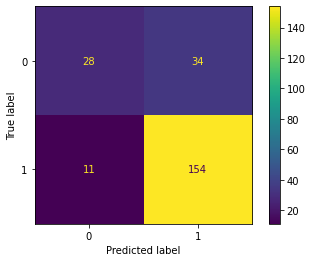

In [33]:
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
clf_model.fit(X_train,y_train)
y_predict = clf_model.predict(X_test)
plot_confusion_matrix(clf_model, X_test, y_test)
clf_acc = accuracy_score(y_test, y_predict)
accuracy_list.append(clf_acc * 100)

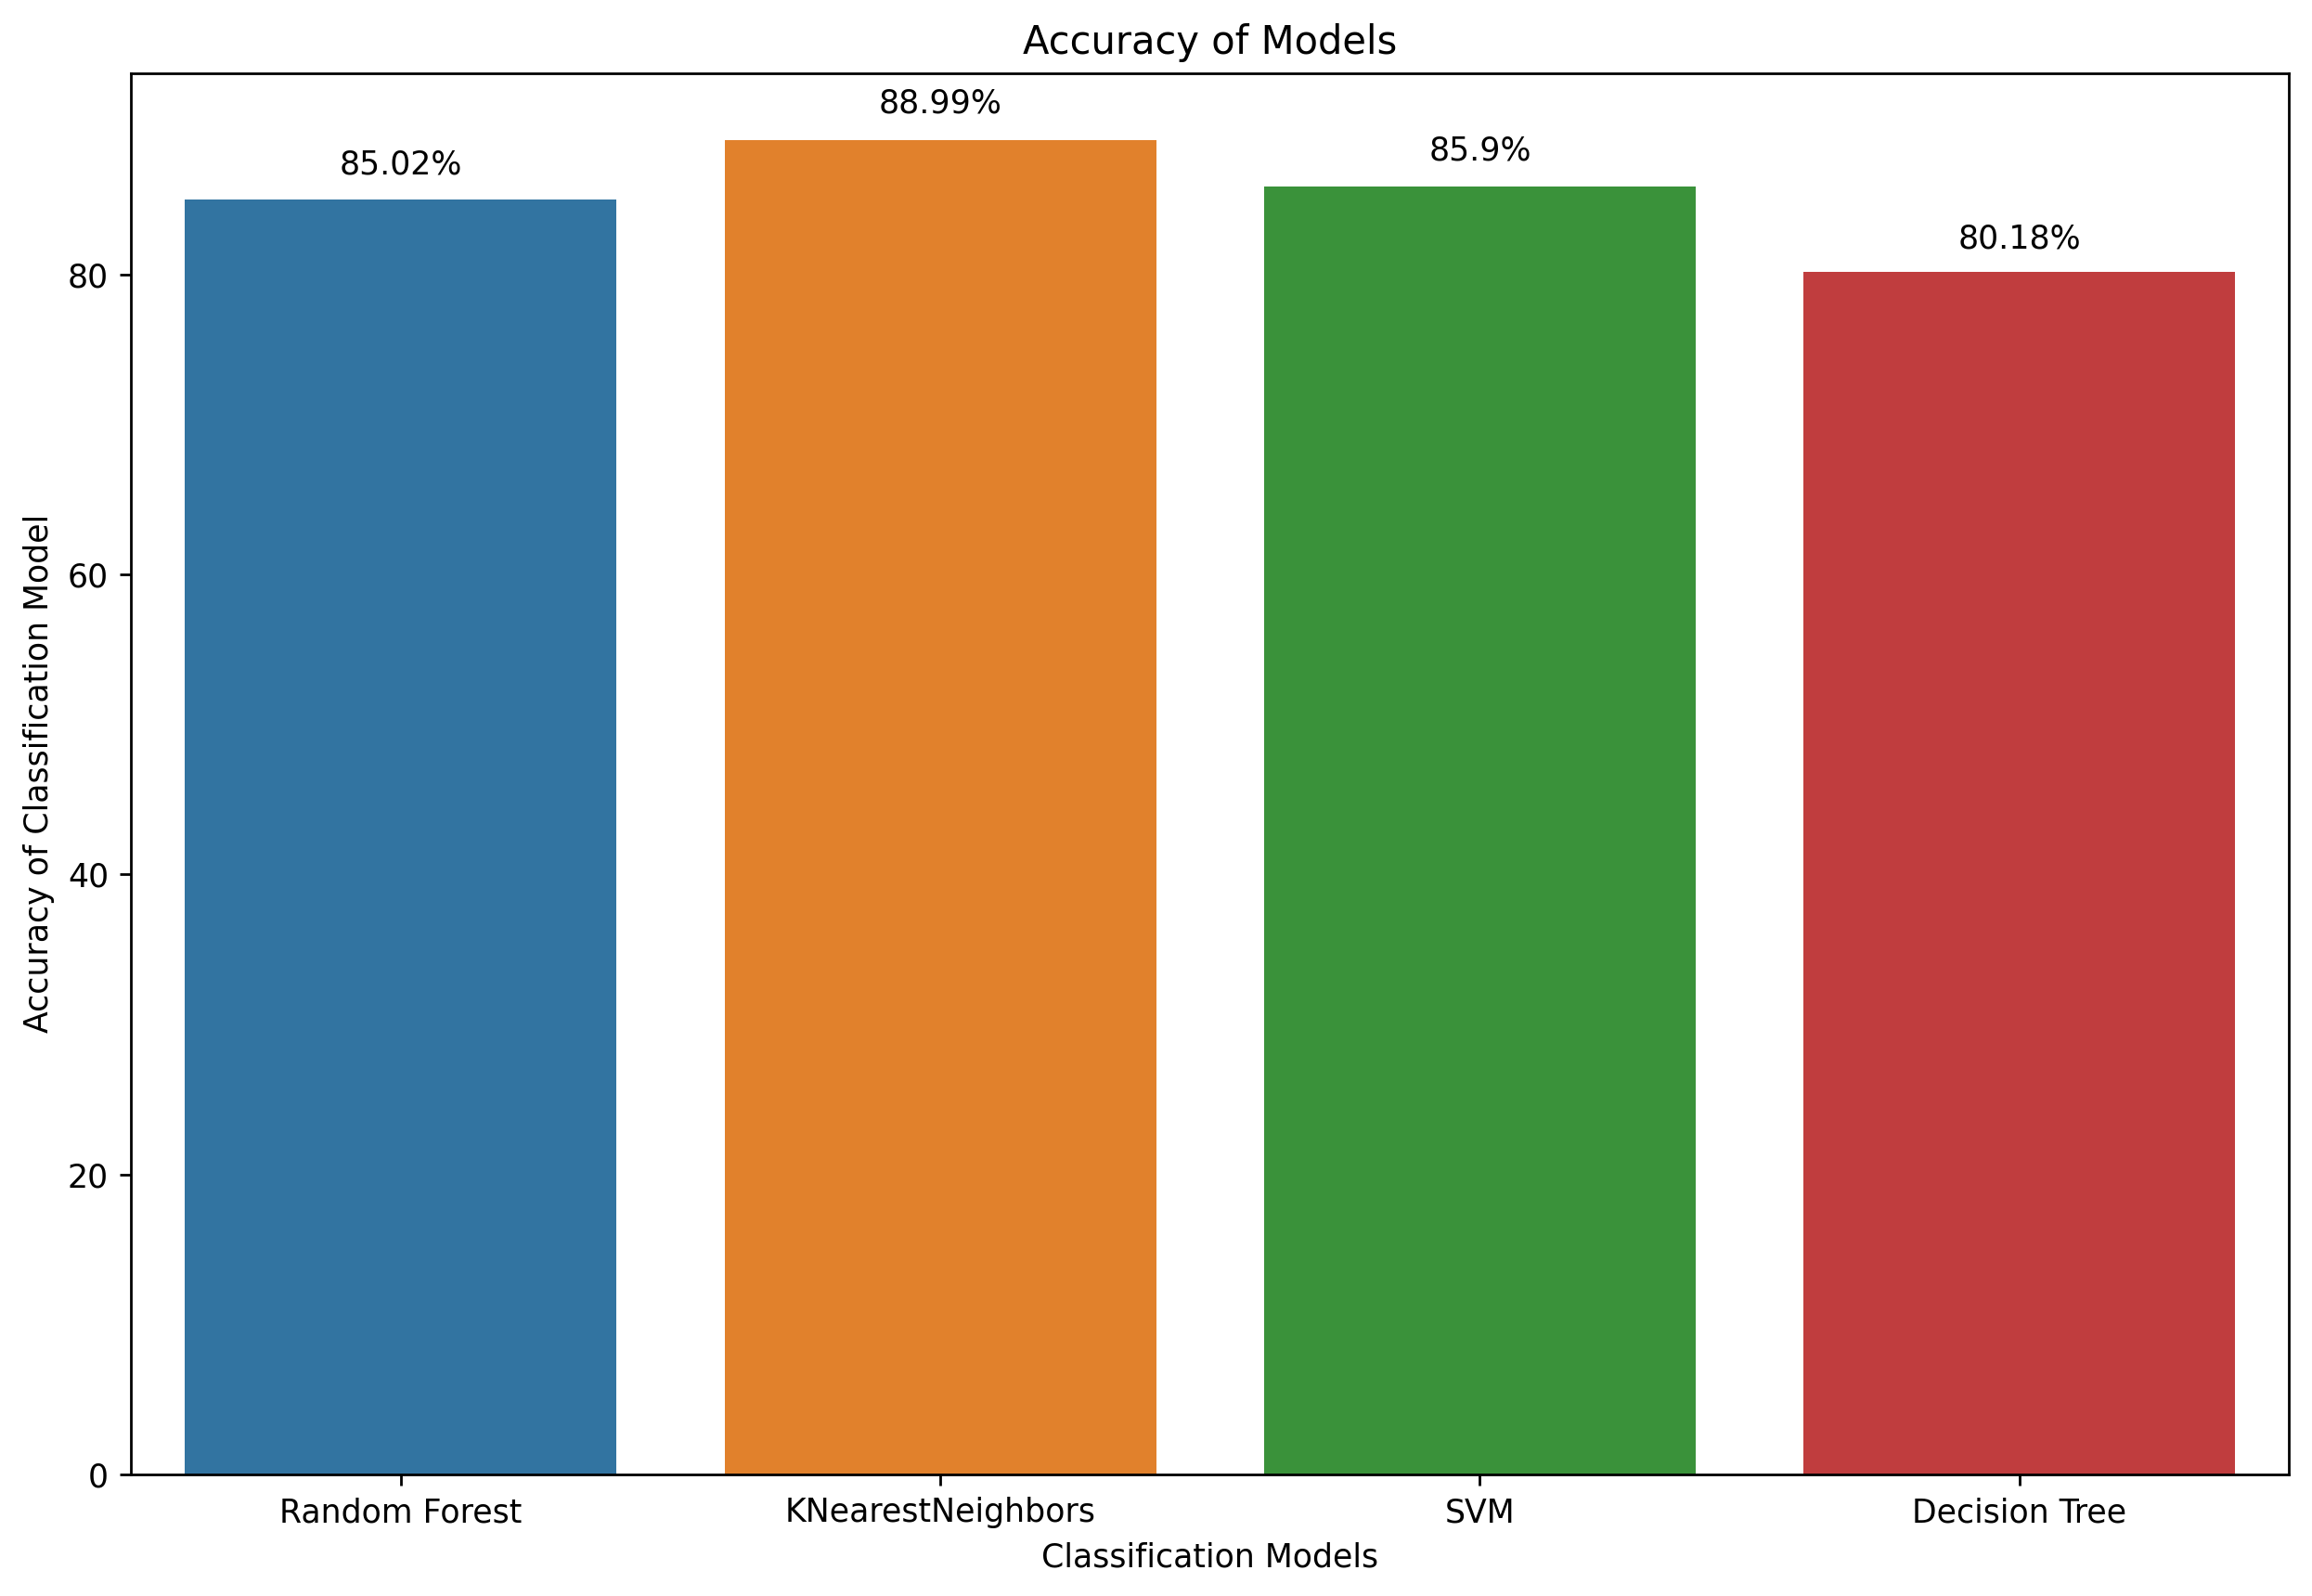

In [34]:
model_list = ["Random Forest", "KNearestNeighbors", "SVM","Decision Tree"]
plt.figure(figsize=(12,8), dpi=250)
ax = sns.barplot(x=model_list, y=accuracy_list)
plt.title("Accuracy of Models")
plt.xlabel('Classification Models')
plt.ylabel("Accuracy of Classification Model")
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center')
plt.show()

In [53]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
# pca2 = PCA()
# y_train = pca2.fit_transform(y_train)
# y_test = pca2.transform(y_test)
explained_variance = pca.explained_variance_ratio_
print(len(list(explained_variance)))
print(max(list(explained_variance)))

529
0.9999854970697848


C:\Users\ASC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


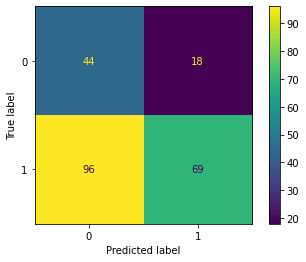

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

accuracy_list = []
rfm = RandomForestClassifier()
rfm.fit(X_train, y_train)
rfm_pred = rfm.predict(X_test)
plot_confusion_matrix(rfm, X_test, y_test)
rfm_acc = accuracy_score(y_test, rfm_pred)
accuracy_list.append(rfm_acc * 100)

C:\Users\ASC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


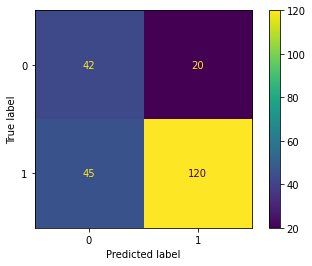

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(scaled_X_train, y_train)
knn_pred = knn.predict(scaled_X_test)
plot_confusion_matrix(knn, X_test, y_test)
knn_acc = accuracy_score(y_test, knn_pred)
accuracy_list.append(knn_acc * 100)

C:\Users\ASC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


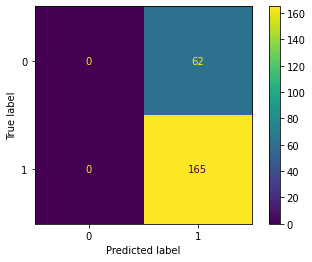

In [43]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
svc = SVC(decision_function_shape='ovo', class_weight='balanced')
param_grid = {'C': [0.001, 0.01, 0.1, 0.5, 1], 'gamma': ['scale', 'auto']}
grid = GridSearchCV(svc, param_grid)
grid.fit(scaled_X_train, y_train)
svc_pred = grid.predict(scaled_X_test)
plot_confusion_matrix(grid, scaled_X_test, y_test)
svc_acc = accuracy_score(y_test, svc_pred)
accuracy_list.append(svc_acc * 100)

C:\Users\ASC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


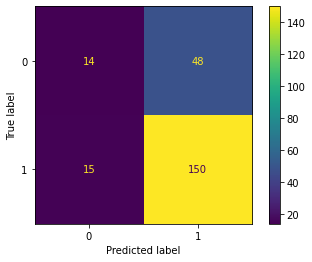

In [44]:
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
clf_model.fit(X_train,y_train)
y_predict = clf_model.predict(X_test)
plot_confusion_matrix(clf_model, X_test, y_test)
clf_acc = accuracy_score(y_test, y_predict)
accuracy_list.append(clf_acc * 100)

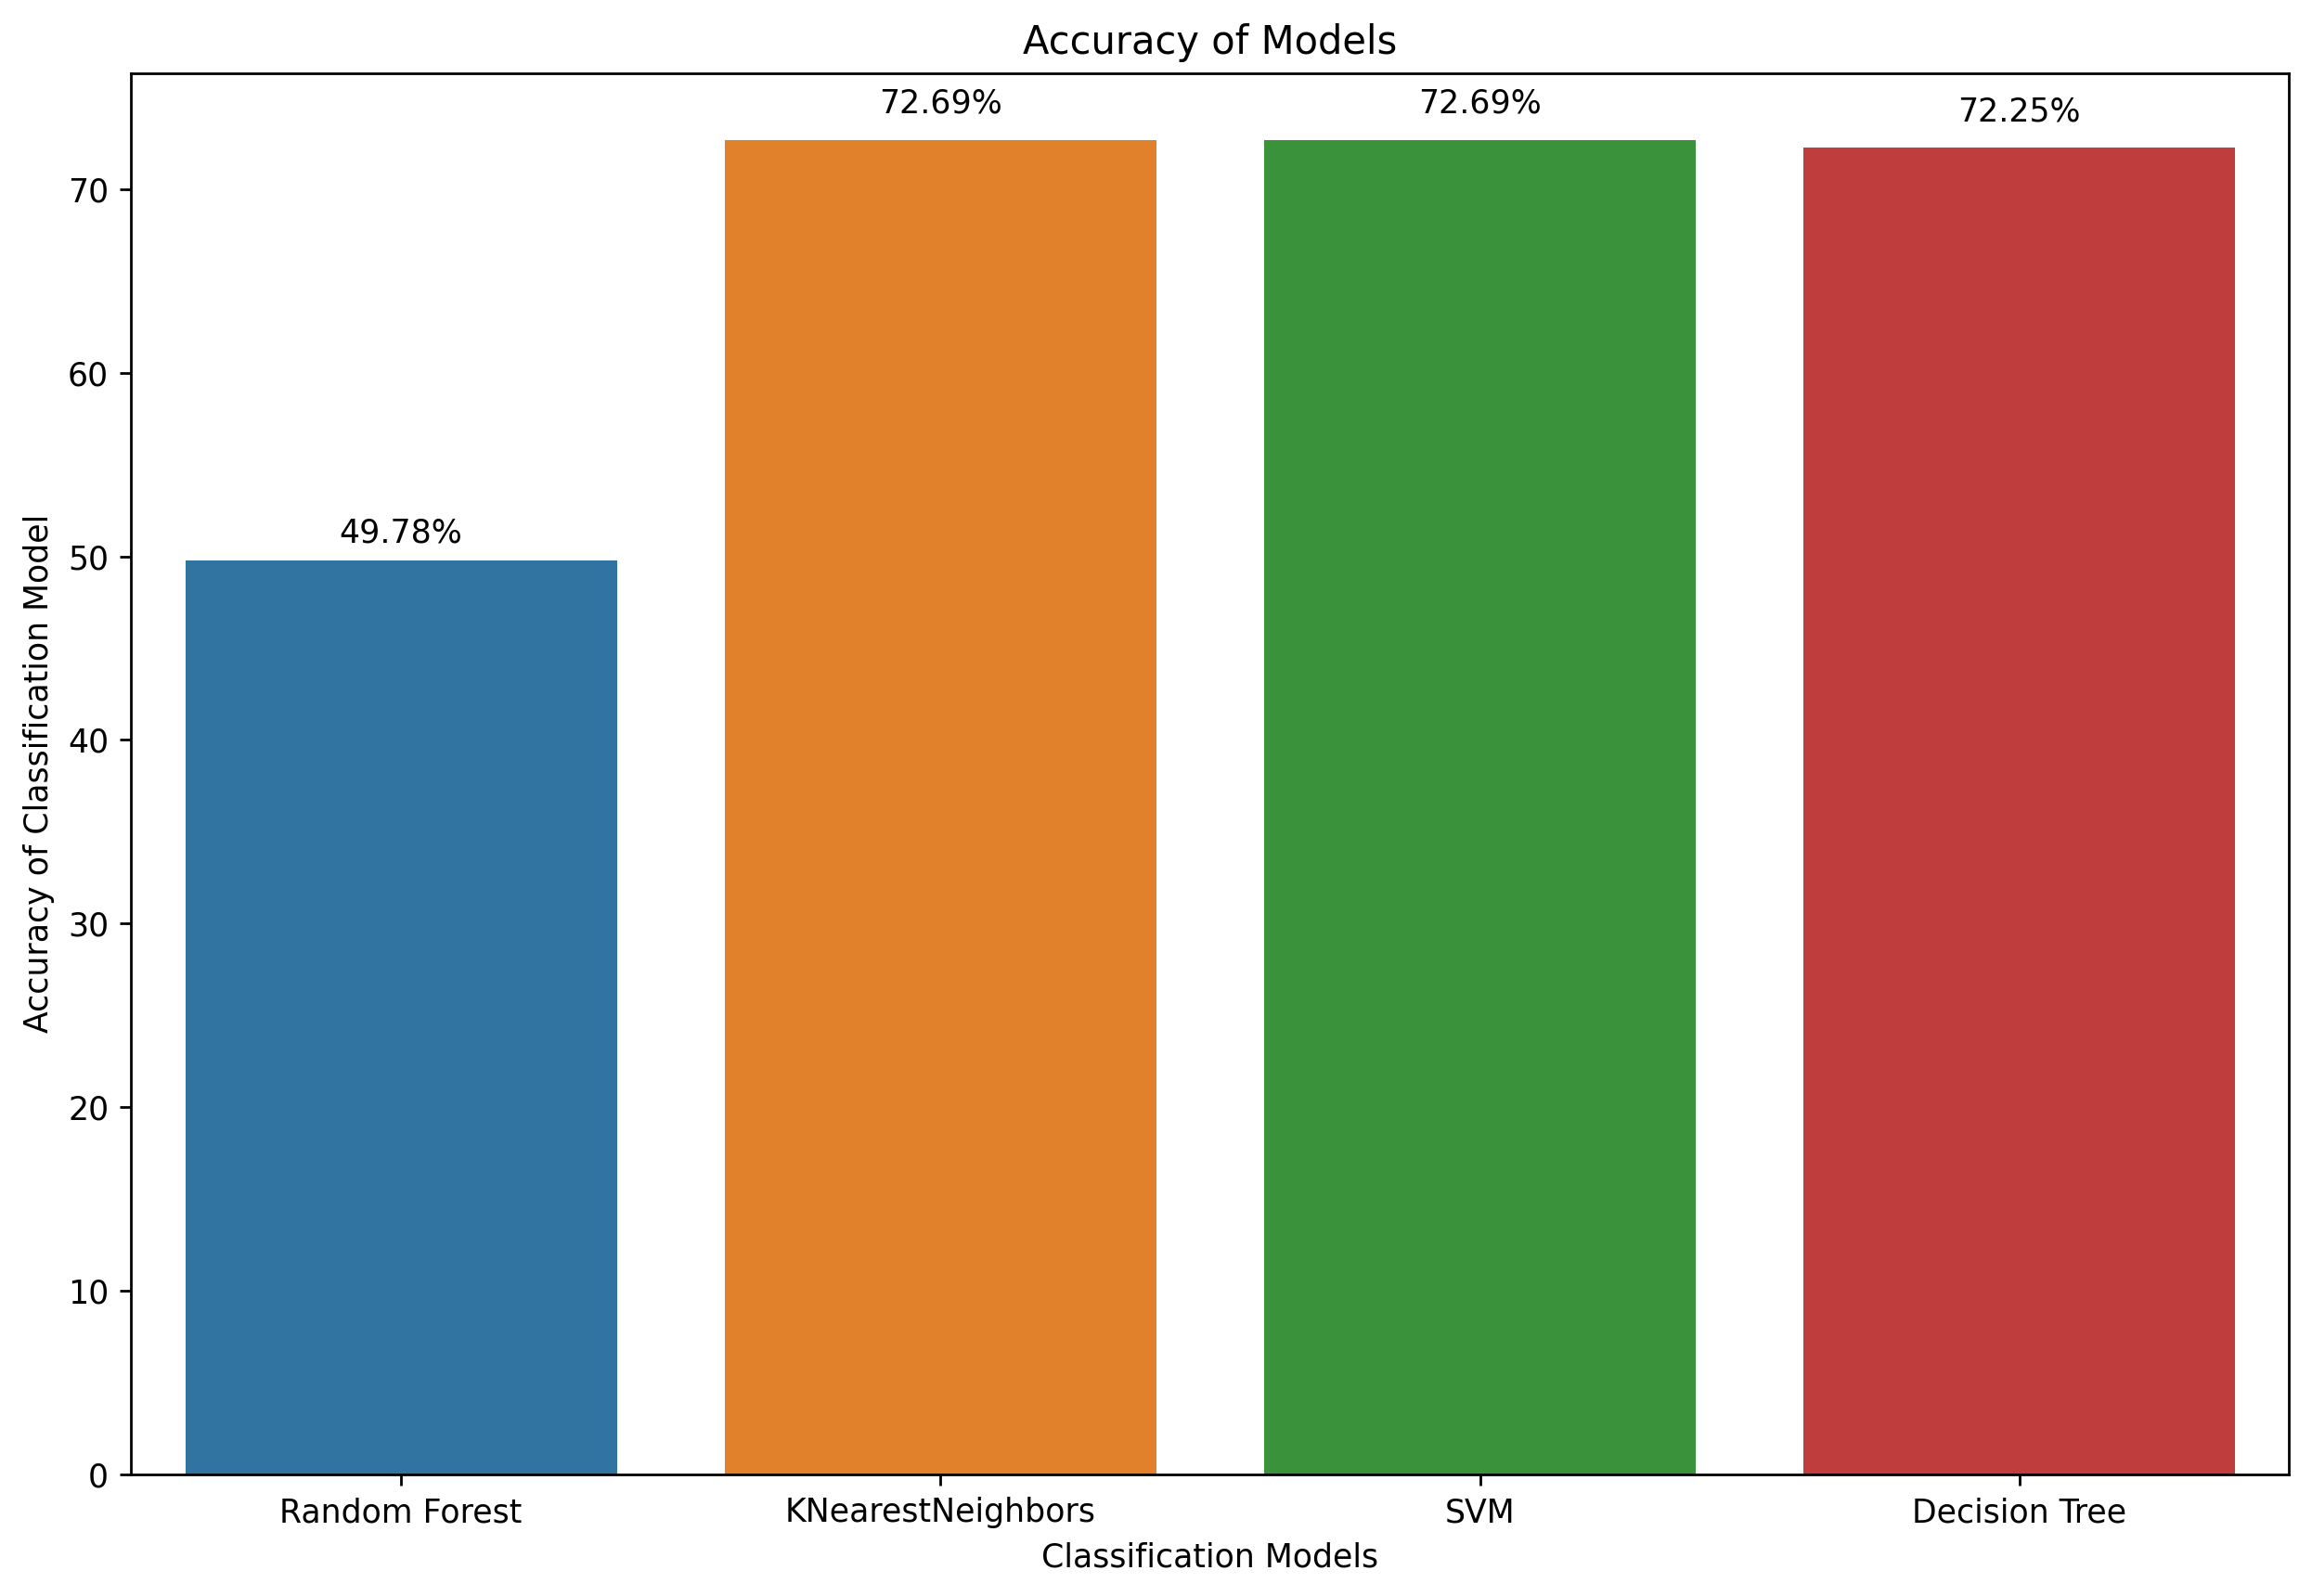

In [45]:
model_list = ["Random Forest", "KNearestNeighbors", "SVM","Decision Tree"]
plt.figure(figsize=(12,8), dpi=250)
ax = sns.barplot(x=model_list, y=accuracy_list)
plt.title("Accuracy of Models")
plt.xlabel('Classification Models')
plt.ylabel("Accuracy of Classification Model")
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center')
plt.show()